In [ ]:
!kaggle datasets download -d putdejudomthai/ecommerce-ab-testing-2022-dataset1 -p /content --unzip

Dataset URL: https://www.kaggle.com/datasets/putdejudomthai/ecommerce-ab-testing-2022-dataset1
License(s): unknown
  0% 0.00/3.29M [00:00<?, ?B/s]
100% 3.29M/3.29M [00:00<00:00, 169MB/s]


In [3]:
import pandas as pd
df = pd.read_csv('dataset/ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


Data Preprocessing

Checking for null values

In [5]:
df.isnull().sum()

,0
user_id,0
timestamp,0
group,0
landing_page,0
converted,0


Checking for missing values

In [6]:
df.isna().sum()

,0
user_id,0
timestamp,0
group,0
landing_page,0
converted,0


Perform Hypothesis Testing(A/B Testing):
we are testing whether the new landing page (treatment) leads to a higher conversion rate than the old landing page (control).
We set up two hypotheses:

🔹 Null Hypothesis (H₀) → The new page does not perform better than the old page.

Mathematically:
𝐻_0
:
𝜇_treatment
=
𝜇_control
H
0
​
 :μ_
treatment
​
 =μ_
control
​

The average conversion rate of the treatment group is equal to the control group.

🔹 Alternative Hypothesis (H₁) → The new page performs differently from the old page.

Mathematically:

𝐻_1
:
𝜇
treatment
≠
𝜇
control

H_0:
​
   μ_treatment
 μ_control
​

The average conversion rates are different.

This is a two-tailed test, meaning we are checking if the new page performs either significantly better or worse than the old one.





In [8]:
from scipy.stats import ttest_ind

# Split test & control groups
control = df[df['group'] == 'control']['converted']
treatment = df[df['group'] == 'treatment']['converted']

# Perform t-test
t_stat, p_value = ttest_ind(control, treatment)

print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

# Check significance
if p_value < 0.05:
    print("The test group performed significantly different from the control group!")
else:
    print("No significant difference between the test and control groups.")


T-statistic: 1.2383, P-value: 0.2156
No significant difference between the test and control groups.



📊 Interpreting the T-Test Results:
1️⃣ P-value < 0.05 (Reject H₀) → Significant difference between the two pages.

The new page has a statistically different conversion rate from the old page.
Action: If the new page performs better, deploy it. If worse, keep the old page.

2️⃣ P-value > 0.05 (Fail to Reject H₀) → No significant difference.

The new page does not perform better or worse than the old page.
Action: Stick with the old page (no reason to change).


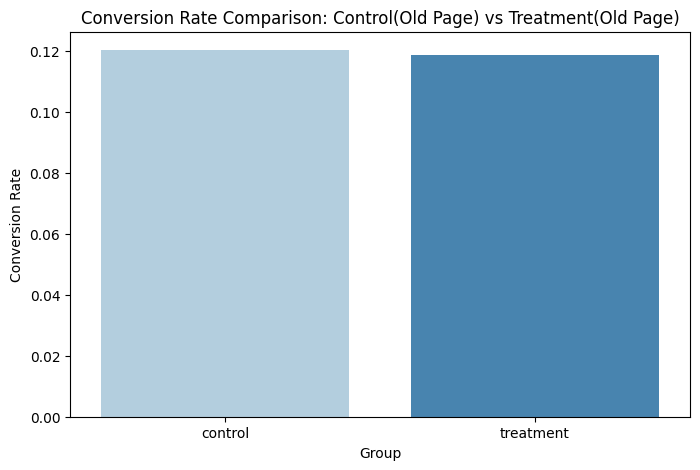

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate conversion rates
conversion_rates = df.groupby('group')['converted'].mean().reset_index()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='group', y='converted', data=conversion_rates, palette='Blues',hue='group', legend= False)
plt.title("Conversion Rate Comparison: Control(Old Page) vs Treatment(Old Page)")
plt.ylabel("Conversion Rate")
plt.xlabel("Group")
plt.show()


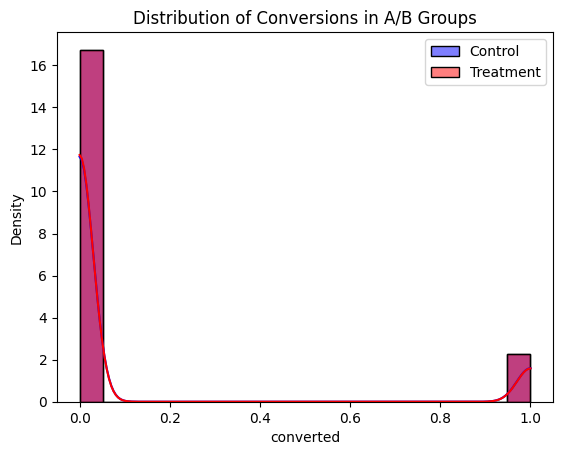

In [13]:
sns.histplot(df[df['group'] == 'control']['converted'], kde=True, label='Control', color='blue', stat="density")
sns.histplot(df[df['group'] == 'treatment']['converted'], kde=True, label='Treatment', color='red', stat="density")
plt.legend()
plt.title("Distribution of Conversions in A/B Groups")
plt.show()


Highly Skewed Distribution => Most users did not convert (0), meaning conversion rates are low overall.

In [15]:
conversion_rates = df.groupby('group')['converted'].mean()
print(conversion_rates)

group
control      0.120399
treatment    0.118918
Name: converted, dtype: float64


As since your conversion data is binary (0 or 1), a Chi-Square Test is a better alternative to the T-test, which assumes normally distributed data.

In [16]:
import pandas as pd
import scipy.stats as stats

# Create a contingency table
contingency_table = pd.crosstab(df['group'], df['converted'])
print(contingency_table)


converted       0      1
group                   
control    129479  17723
treatment  129764  17514


In [17]:
# Run Chi-Square Test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Decision based on p-value
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in conversion rates.")
else:
    print("Fail to reject the null hypothesis: No significant difference in conversion rates.")


Chi-Square Statistic: 1.5193
P-value: 0.2177
Fail to reject the null hypothesis: No significant difference in conversion rates.


<h1> Conclusion from both Chi-Square and T-Test is that there is no statistically significant difference between the old and new landing pages, so the business should keep the old page which prevents unnecessary changes that could cost money without providing any real benefit.

